타이타닉 생존 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

In [2]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [3]:
df.columns = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings','Parents', 'Fare']
df = df.set_index('Name')


In [4]:
df.Survived.mean() #38% 생존

0.3855693348365276

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

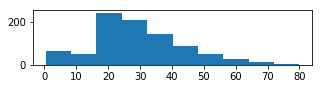

In [5]:
plt.figure(figsize=(5,1))
plt.hist(df['Age'].values)



(array([216.,   0., 184.,   0., 487.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <a list of 5 Patch objects>)

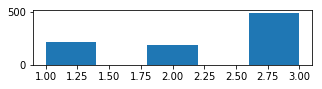

In [6]:
plt.figure(figsize=(5,1))
plt.hist(df['Pclass'].values,bins=5)

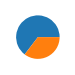

In [7]:
plt.figure(figsize=(5,1))
s = df['Sex']
s.value_counts()

p = plt.pie(s.value_counts())

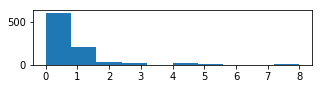

In [8]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

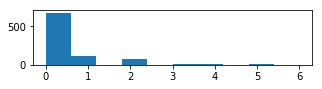

In [9]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Parents'].values)

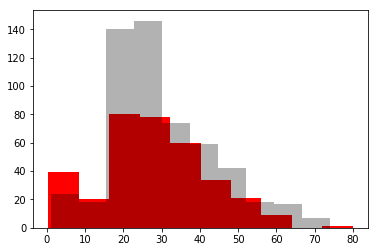

In [10]:
p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.3)


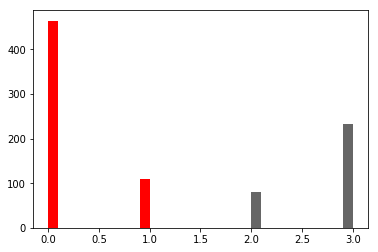

In [11]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color='red')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color='black', alpha=0.6)


In [12]:
df["Pclass"]= df["Pclass"].astype('object')

In [13]:
df.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [14]:
data = pd.get_dummies(df)

In [15]:
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [16]:
X = data.drop(columns='Survived')
y = data['Survived']

In [17]:
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

In [29]:
model.score(X,y)

0.8534385569334837

In [ ]:
df['Survived'].unique()

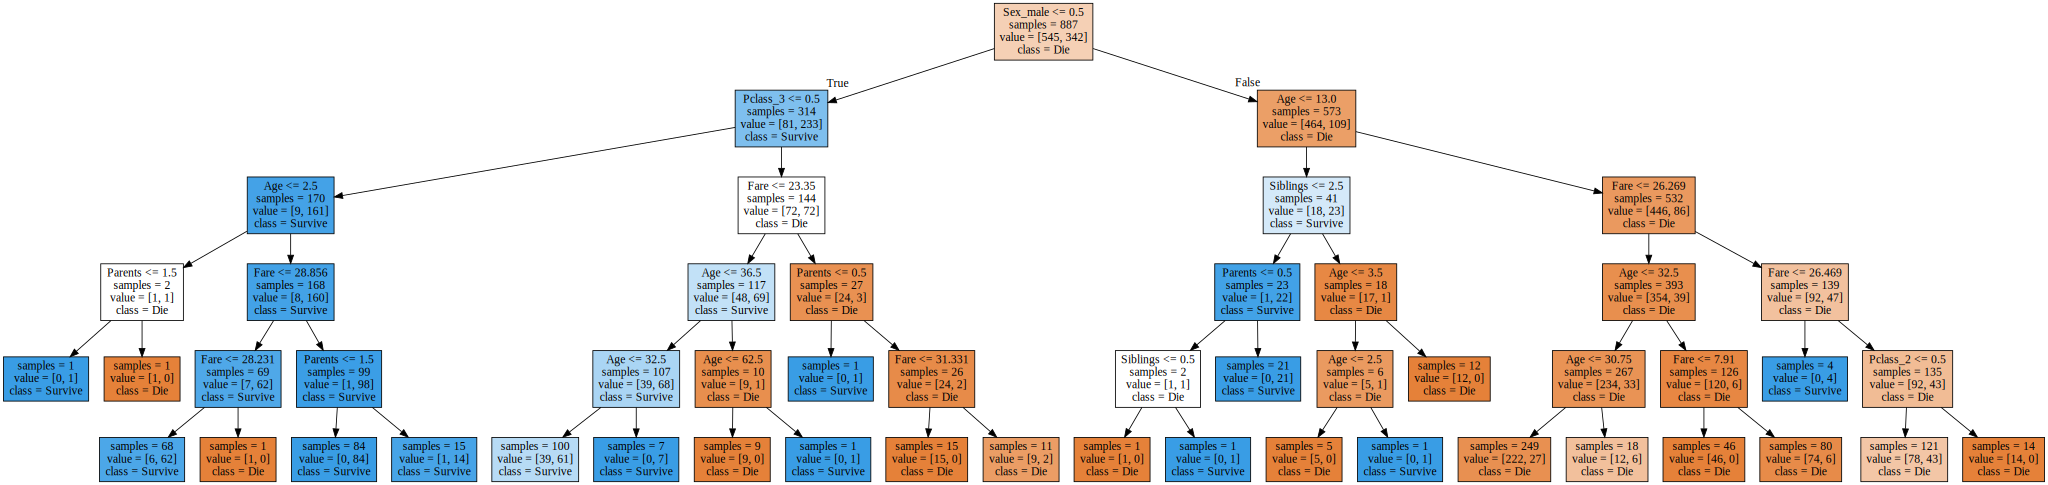

In [31]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','Survive'],
                feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f : 
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [33]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [36]:
#누락 데이터 체크
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [39]:
loans = loans.dropna()
loans.isna().sum().sum()

0

In [41]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [46]:
loans['not.fully.paid'].mean(), loans.purpose.unique()

(0.1598360655737705, array(['debt_consolidation', 'credit_card', 'all_other',
        'home_improvement', 'small_business', 'major_purchase',
        'educational'], dtype=object))

In [43]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

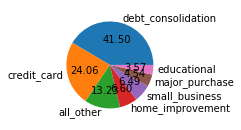

In [48]:
plt.figure(figsize=(2,2))
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(), autopct='%.2f')

Text(0.5, 1.0, 'installment')

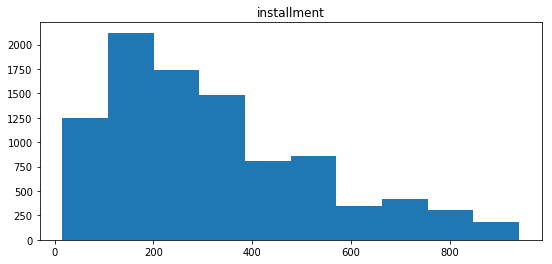

In [54]:
plt.figure(figsize=(9,4))
plt.hist(loans['installment'])
plt.title('installment')

Text(0.5, 1.0, 'int.rate')

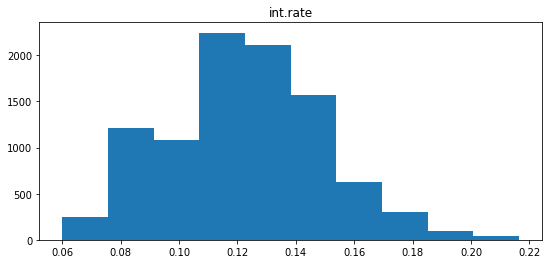

In [55]:
plt.figure(figsize=(9,4))
plt.hist(loans['int.rate'])
plt.title('int.rate')

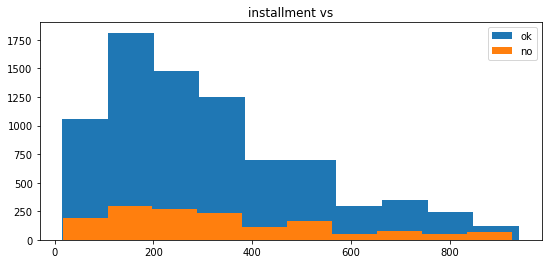

In [59]:
plt.figure(figsize=(9,4))
#데이터[조건]
plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
plt.title('installment vs')
plt.legend()

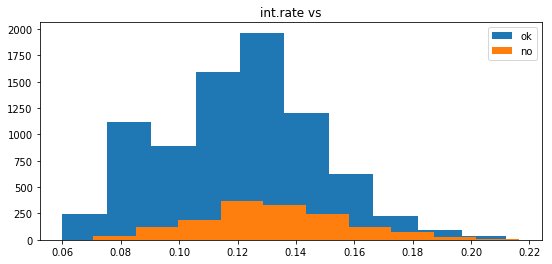

In [60]:
plt.figure(figsize=(9,4))
#데이터[조건]
plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
plt.title('int.rate vs')
plt.legend()

In [67]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [61]:
loans = pd.ge
t_dummies(loans)#카테고리르 원핫 인코딩

In [64]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [63]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [65]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

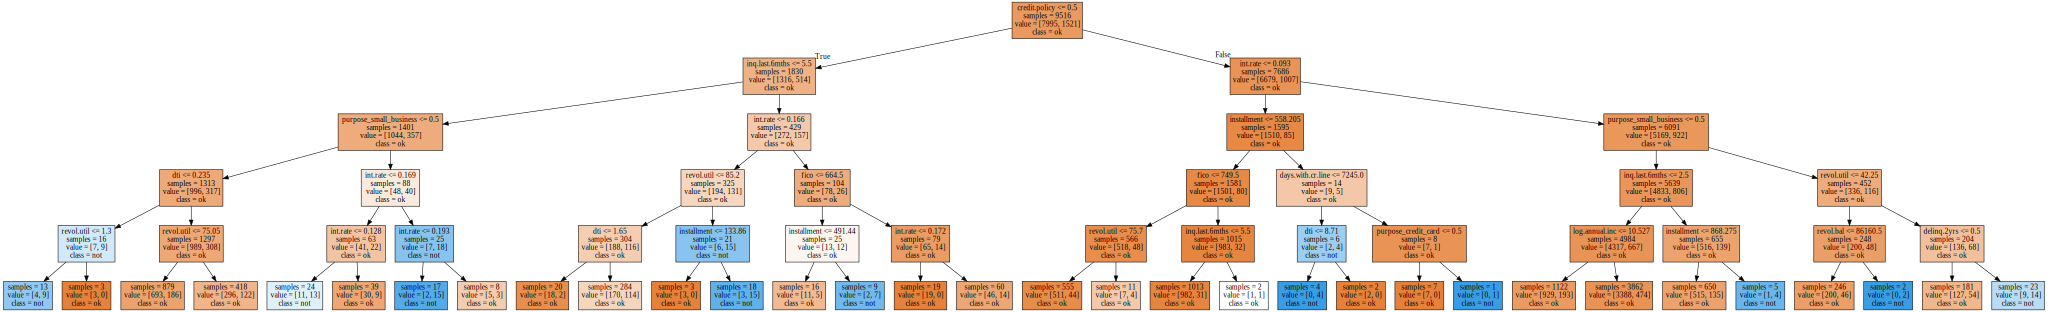

In [66]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not'],
                feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f : 
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)